<center><h1>Inteligencia Artificial</header1></center>

Presentado por: Genesis Belen Heredia Zambrano  <br>
Fecha: 27 / 07 / 2022

# Importación de librerias necesarias

In [11]:
#Para esta actividad se importarán las siguientes librerías:

#Se realiza la importación de la libreria pandas
import pandas as pd

#Se realiza la importación de la libreria sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Se realiza la importación de la libreria statsmodels
import statsmodels.api as smi

#Se realiza la importación de la libreria necesaria para la regresión lineal
from sklearn.linear_model import LinearRegression 

#Se realiza la importación de la libreria que permite realizar la grafica
import matplotlib.pyplot as plt

#Se realiza la importación de la libreria que permite realizar la grafica
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Cargar el Dataset

In [12]:
#Código para cargar el Dataset
BreastCancer = pd.read_csv("breast-cancer.csv")

In [13]:
#Head: Devuelve las n primeras filas.
BreastCancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Descripción de la fuente del Dataset

El cáncer de mama es el cáncer más común entre las mujeres en el mundo. Representa el 25 % de todos los casos de cáncer y afectó a más de 2,1 millones de personas solo en 2015. Comienza cuando las células en el seno comienzan a crecer sin control. Estas células generalmente forman tumores que se pueden ver a través de rayos X o sentir como bultos en el área del seno.

Los desafíos clave contra su detección es cómo clasificar los tumores en malignos (cancerosos) o benignos (no cancerosos). Le pedimos que complete el análisis de clasificación de estos tumores mediante el aprendizaje automático (con SVM) y el conjunto de datos (diagnóstico) de Wisconsin de cáncer de mama.

**Variable Objetivo (y)**

    diagnosis = Realiza un diagnóstico para identificar si el tumor es malignoo benigno
    
**Variables de entrada (x)**

     id : Identificador
     radius_mean : radio promedio             
     texture_mean : textura media           
     perimeter_mean : perímetro medio          
     area_mean  :  área media            
     smoothness_mean  : suavidad media       
     compactness_mean  :   compacidad media    
     concavity_mean     :    media concavidad  
     concave points_mean :      puntos cóncavos media
     symmetry_mean        :    simetría_media
     fractal_dimension_mean :   media dimensión fractal
     radius_se               : radio se
     texture_se               : textura se
     perimeter_se             : perímetro se
     area_se                 : area se
     smoothness_se            : suavidad se
     compactness_se           : compacidad se
     concavity_se            : concavidad se
     concave points_se        : puntos cóncavos se
     symmetry_se              : simetría se
     fractal_dimension_se     : fractal_dimension_se
     radius_worst            : radio_peor
     texture_worst            : textura_peor
     perimeter_worst         : perímetro_peor
     area_worst              : area_peor
     smoothness_worst        : peor_suavidad
     compactness_worst       : compacidad_peor
     concavity_worst          : concavidad_peor
     concave points_worst     : puntos cóncavos_peor
     symmetry_worst          : simetría_peor 
     fractal_dimension_worst : fractal_dimension_peor



## Explique el problema a resolver. 

El presente dataset contiene información correspondiente a la clasificación de tumores malignos o benignos causados por el cáncer de mama, haciendo uso de aprendizaje automático y los datos estadísticos proporcionados. 


## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total : 32
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [14]:
#Visualizar los datos que contiene el dataset
BreastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
#Código que responde a la descripción anterior
BreastCancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


array([[<AxesSubplot:title={'center':'diagnosis'}>]], dtype=object)

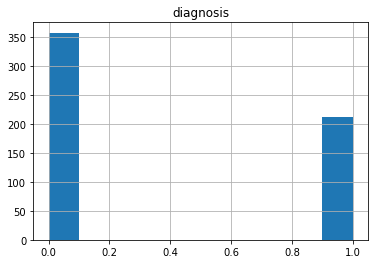

In [29]:
BreastCancer.hist('diagnosis')

En el  histograma realizado para la variable objetivo podemos deducir que se puede aplicar el modelo de clasificación.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [18]:
#Transformación de las caracteristicas 
encoder = LabelEncoder()
BreastCancer['diagnosis'] = encoder.fit_transform(BreastCancer['diagnosis'])
BreastCancer['diagnosis'].unique()

array([1, 0], dtype=int64)

In [20]:
#Visualización de los datos transformados
BreastCancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
#Descripción del dataset
BreastCancer.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [21]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.

#Transformación de las caracteristicas
# Variable objetivo (y) - variables de entrada (x)
VariablesEntrada=['id','id','radius_mean', 'texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','radius_worst','texture_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']
VariableObjetivo=['diagnosis']
X=BreastCancer[VariablesEntrada]
y=BreastCancer[VariableObjetivo]

In [22]:
#Estandarización del dataset
from sklearn.preprocessing import StandardScaler
VariablesEntradaScaler=StandardScaler()
VariableObjetivoScaler=StandardScaler()

In [23]:
#Almacenamiento del objeto de ajuste para referencia posterior
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
VariableObjetivoFit=VariableObjetivoScaler.fit(y)

In [24]:
#Generación de los valores estandarizados de X - Y
X=VariablesEntradaFit.transform(X)
y=VariableObjetivoFit.transform(y)

## División del dataset en datos de entrenamiento y datos de test 

In [25]:
#Divida los datos en un conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
#Comprobación rápida del tamaño de los conjuntos de datos de entrenamiento y prueba
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(398, 21)
(398, 1)
(171, 21)
(171, 1)


## Modelamiento

In [27]:
#Códo del modelo

#Importar las librerias necesarias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [33]:
#Entrenamiento

# load the dataset

BreastCancer = datasets.BreastCancer()



AttributeError: module 'sklearn.datasets' has no attribute 'BreastCancer'

In [8]:
#Test

## Evaluación del Modelo

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 